In [2]:
import sys
sys.path.append("..")

In [3]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [4]:
results_QNN = load_feather_folder_as_pd("../data/results/DE_0_32")

['../data/results/DE_0_32\\0.feather', '../data/results/DE_0_32\\1.feather', '../data/results/DE_0_32\\2.feather', '../data/results/DE_0_32\\3.feather']
0.08330416679382324


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

In [13]:

results_QNN["epochs"] = results_QNN["loss_history"].apply(lambda x: np.arange(len(x)))
results_QNN["LR"] = results_QNN["lr"].apply(lambda x: f"{x}" if type(x) == np.float64 else "Decaying rate")

In [6]:
results_QNN_exploded = results_QNN.explode(["epochs", "loss_history", "mse_history"])

#results_QK_exploded["loss_history"] change name to results_QK_exploded["$\mathcal{L}(f^\prime(x), f(x), x)$"]
loss_history_str = "$\mathcal{L}(f^\prime(x), f(x), x)$"
mse_history_str = r"$|f(x)-f_{\mathrm{exact}}(x)|^2$"
paper_str = "$\lambda e^{-\lambda k x} \sin(\lambda x) + \lambda k f(x) + df/dx$ = 0"
log_str = r"$\frac{df}{dx} - \lambda e^{kf(x)} = 0$"

results_QNN_exploded["loss_name"] = results_QNN_exploded["loss_name"].apply(lambda x: paper_str if x == "paper" else x)
results_QNN_exploded["loss_name"] = results_QNN_exploded["loss_name"].apply(lambda x: log_str if x == "log_ode" else x)

results_QNN_exploded[loss_history_str] = results_QNN_exploded["loss_history"]
results_QNN_exploded[mse_history_str] = results_QNN_exploded["mse_history"]

In [7]:
#concatenate the two dataframes
results = results_QNN_exploded
results["Number of qubits"] = results["num_qubits"]
results["Iteration"] = results["epochs"]

#if results lr is an array, create a new column LR = "Decaying rate"
#if results lr is a float, create a new column LR = f"{lr}"

results["LR"] = results["lr"].apply(lambda x: f"{x}" if type(x) == np.float64 else "Decaying rate")

In [57]:
results

,f_sol,optimal_alpha,mse,method,loss_name,domain,executor_type,encoding_circuit,num_qubits,num_layers,...,tol,loss_history,mse_history,gradient_history,epochs,"$\mathcal{L}(f^\prime(x), f(x), x)$",$|f(x)-f_{\mathrm{exact}}(x)|^2$,Number of qubits,Iteration,LR
0,"[1.0, -0.07572578921345591, 0.0203045458570994...","[-0.9771322313255684, 2.7117133527833897, -6.3...",0.000844,QNN,paper_decay_QNN,"[0.0, 0.04285714285714286, 0.08571428571428572...",pennylane,ChebyshevTowerAndHEE,6,5,...,0.00001,6092.9589,0.14869,"[35143.87177, 7820.00414, 28860.72634, 13085.6...",0,6092.9589,0.14869,6,0,Decaying rate
0,"[1.0, -0.07572578921345591, 0.0203045458570994...","[-0.9771322313255684, 2.7117133527833897, -6.3...",0.000844,QNN,paper_decay_QNN,"[0.0, 0.04285714285714286, 0.08571428571428572...",pennylane,ChebyshevTowerAndHEE,6,5,...,0.00001,704.24165,0.1554,"[35143.87177, 7820.00414, 28860.72634, 13085.6...",1,704.24165,0.1554,6,1,Decaying rate
0,"[1.0, -0.07572578921345591, 0.0203045458570994...","[-0.9771322313255684, 2.7117133527833897, -6.3...",0.000844,QNN,paper_decay_QNN,"[0.0, 0.04285714285714286, 0.08571428571428572...",pennylane,ChebyshevTowerAndHEE,6,5,...,0.00001,3306.36245,0.17298,"[35143.87177, 7820.00414, 28860.72634, 13085.6...",2,3306.36245,0.17298,6,2,Decaying rate
0,"[1.0, -0.07572578921345591, 0.0203045458570994...","[-0.9771322313255684, 2.7117133527833897, -6.3...",0.000844,QNN,paper_decay_QNN,"[0.0, 0.04285714285714286, 0.08571428571428572...",pennylane,ChebyshevTowerAndHEE,6,5,...,0.00001,1590.20811,0.13996,"[35143.87177, 7820.00414, 28860.72634, 13085.6...",3,1590.20811,0.13996,6,3,Decaying rate
0,"[1.0, -0.07572578921345591, 0.0203045458570994...","[-0.9771322313255684, 2.7117133527833897, -6.3...",0.000844,QNN,paper_decay_QNN,"[0.0, 0.04285714285714286, 0.08571428571428572...",pennylane,ChebyshevTowerAndHEE,6,5,...,0.00001,1016.04383,0.12083,"[35143.87177, 7820.00414, 28860.72634, 13085.6...",4,1016.04383,0.12083,6,4,Decaying rate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,"[1.0, 0.21516936141222126, -0.0183243549398285...","[-895.7818226765885, -4913.8664497988075, 7125...",0.001,QNN,paper_decay_QNN,"[0.0, 0.04285714285714286, 0.08571428571428572...",pennylane,ChebyshevTowerAndHEE,6,5,...,0.00001,1975.397548,20522.85806,"[5784.8747514, 1878.7966438, 3146.9963003, 397...",107,1975.397548,20522.85806,6,107,Decaying rate
3,"[1.0, 0.21516936141222126, -0.0183243549398285...","[-895.7818226765885, -4913.8664497988075, 7125...",0.001,QNN,paper_decay_QNN,"[0.0, 0.04285714285714286, 0.08571428571428572...",pennylane,ChebyshevTowerAndHEE,6,5,...,0.00001,1498.795275,18152.095045,"[5784.8747514, 1878.7966438, 3146.9963003, 397...",108,1498.795275,18152.095045,6,108,Decaying rate
3,"[1.0, 0.21516936141222126, -0.0183243549398285...","[-895.7818226765885, -4913.8664497988075, 7125...",0.001,QNN,paper_decay_QNN,"[0.0, 0.04285714285714286, 0.08571428571428572...",pennylane,ChebyshevTowerAndHEE,6,5,...,0.00001,1853.725161,17784.752306,"[5784.8747514, 1878.7966438, 3146.9963003, 397...",109,1853.725161,17784.752306,6,109,Decaying rate
3,"[1.0, 0.21516936141222126, -0.0183243549398285...","[-895.7818226765885, -4913.8664497988075, 7125...",0.001,QNN,paper_decay_QNN,"[0.0, 0.04285714285714286, 0.08571428571428572...",pennylane,ChebyshevTowerAndHEE,6,5,...,0.00001,428.580597,8057.159783,"[5784.8747514, 1878.7966438, 3146.9963003, 397...",110,428.580597,8057.159783,6,110,Decaying rate


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_21836\1647002862.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(x="Iteration", y=loss_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future ver

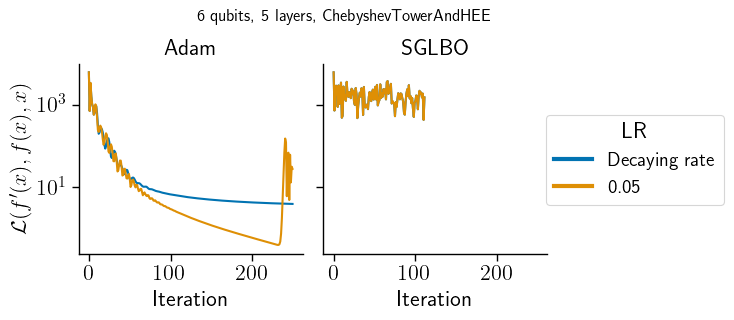

In [59]:
import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})


palette = sns.color_palette("colorblind", 10)
g = sns.relplot(x="Iteration", y=loss_history_str, 
                data=results,
                kind="line", 
                row="loss_name", 
                col="optimizer",
                hue="LR",
                height=3,  # Adjust the height as needed
                aspect=1,  
                palette=palette,
                linewidth=1.5
                )

#suptitle with num_qubits, loss_name, 

g.fig.suptitle(f"{results['Number of qubits'].iloc[0]} qubits, {results['num_layers'].iloc[0]} layers, {results['encoding_circuit'].iloc[0]}", y=1.05)

g.set_titles("{col_name}")
g.set(yscale="log") 

leg = g._legend
leg.set_frame_on(True)


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_21836\216346376.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(x="Iteration", y=mse_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future versi

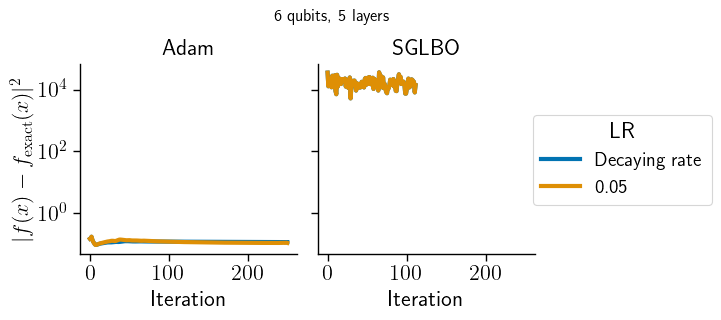

In [9]:

import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})


palette = sns.color_palette("colorblind", 10)
g = sns.relplot(x="Iteration", y=mse_history_str, 
                data=results,
                kind="line", 
                row="loss_name", 
                col="optimizer",
                hue="LR",
                height=3,  # Adjust the height as needed
                aspect=1,  
                palette=palette,
                linewidth=3
                )

#suptitle with num_qubits, loss_name, 

g.fig.suptitle(f"{results['Number of qubits'].iloc[0]} qubits, {results['num_layers'].iloc[0]} layers", y=1.05)

g.set_titles("{col_name}")
g.set(yscale="log") 

leg = g._legend
leg.set_frame_on(True)

In [18]:
#explode f_sol and domain

results_f_sol = results_QNN.explode(["f_sol", "domain"])

In [46]:
mapping_of_derivatives_of_loss_functions

{'paper': <function DE_Library.diferential_equation_functionals.derivatives_loss_paper(f_alpha_tensor, x)>,
 'log_ode': <function DE_Library.diferential_equation_functionals.derivatives_loss_log_ode(f_alpha_tensor, x_span=None)>,
 'polynomial_with_exp': <function DE_Library.diferential_equation_functionals.derivatives_loss_polynomial_with_exp(f_alpha_tensor, x)>,
 'harmonic_oscillator': <function DE_Library.diferential_equation_functionals.derivatives_loss_harmonic_oscillator(f_alpha_tensor, x_span)>,
 'paper_decay_QNN': <function DE_Library.diferential_equation_functionals.derivatives_loss_paper_decay_QNN(f_alpha_tensor, x)>,
 'simple_test_QNN': <function DE_Library.diferential_equation_functionals.derivatives_loss_simple_test_QNN(f_alpha_tensor, x_span)>,
 'damped_harmonic_oscillator': <function DE_Library.diferential_equation_functionals.derivatives_loss_damped_harmonic_oscillator(f_alpha_tensor, x_span)>}

In [55]:
f_initial = 1
x_line = np.linspace(0, 0.9, 50)
x_line_short = np.linspace(0, 0.9, 22)
true_sol = odeint(mapping_of_derivatives_of_loss_functions["paper_decay_QNN"], f_initial, x_line[:])
true_sol_short = odeint(mapping_of_derivatives_of_loss_functions["paper_decay_QNN"], f_initial, x_line_short[:])


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_21836\2239894570.py:30: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.lineplot(x="domain", y="f_sol",
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


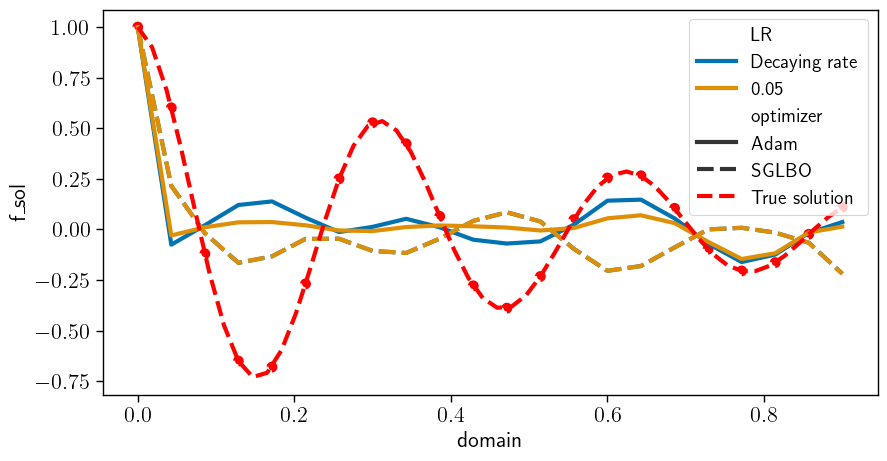

In [56]:

import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})


#create ax[0] 

fig, axs  = plt.subplots(1, 1, figsize=(10, 5))

#result explode f_sol, 

palette = sns.color_palette("colorblind", 10)
"""
g = sns.relplot(x="domain", y="f_sol", 
                data=results_f_sol,
                kind="line", 
                row="loss_name", 
                col="optimizer",
                hue="LR",
                height=3,  # Adjust the height as needed
                aspect=1,  
                palette=palette,
                linewidth=3, 
                ax=axs[0]
                )
"""

g = sns.lineplot(x="domain", y="f_sol", 
                data=results_f_sol,
                hue="LR",
                style="optimizer",
                palette=palette,
                linewidth=3, 
                ax=axs
                )

axs.plot(x_line, true_sol, label="True solution", linestyle="--", color="red", linewidth=3)
axs.scatter(x_line_short, true_sol_short, linestyle="--", color="red", linewidth=3)

plt.legend()

#suptitle with num_qubits, loss_name, 

#g.fig.suptitle(f"{results['Number of qubits'].iloc[0]} qubits, {results['num_layers'].iloc[0]} layers", y=1.05)


leg.set_frame_on(True)